In [1]:
import random

from pathlib import Path

from hc.optim import optimise
from utils.data import load_yaml_config, read_fasta
from utils.plot import plot_loss
from utils.seed import seed_everything
from utils.tree import sample_tree

## Load configuraiton file

In [31]:
cfg_path = 'cfg/hc_config.yml'

print('Loading config...')
cfg = load_yaml_config(cfg_path)
seed_everything(random.randint(0, cfg.max_seed) if cfg.seed is None else cfg.seed)

Loading config...
{'debug': True,
 'fasta_path': 'h3n2_na_20.fa',
 'max_seed': 42,
 'patience': 3,
 'raxml_path': 'path/to/raxml-ng_v1.1.0_linux_x86_64/',
 'repo_path': 'path/to/phylo2vec',
 'rooted': False,
 'seed': None,
 'substitution_model': 'GTR'}
Global seed set to 41


## Load data from a FASTA file to a pandas DataFrame

In [3]:
print('Loading data...')
data = read_fasta(Path(cfg.repo_path, 'data', cfg.fasta_path)).replace('-', float('nan'))

k = data.shape[1] - 1

taxa_dict = {i: col.replace(' ', '.') for (i, col) in enumerate(data.columns)}

print(f'Data: {data.shape[0]} sites; {k+1} taxa.')

data.head()

Loading data...
Data: 1407 sites; 19 taxa.


,A_Hawaii_02_2013_KF789866_05_28_2013_USA_12_13_H3N2_1_1409,A_Boston_DOA2_107_2012_CY148382_11_01_2012_USA_12_13_H3N2_1_1409,A_Oregon_15_2009_GQ895004_06_25_2009_USA_08_09_H3N2_1_1409,A_Hong_Kong_H090_695_V10_2009_CY115546_07_10_2009_Hong_Kong__H3N2_8_1416,A_New_York_182_2000_CY001279_02_18_2000_USA_99_00_H3N2_1_1409,A_Canterbury_58_2000_CY009150_09_05_2000_New_Zealand__H3N2_8_1416,A_Minab_797_2011_KC865620_12_24_2011_Iran__H3N2_20_1428,A_Nebraska_15_2011_KC892583_12_15_2011_USA_11_12_H3N2_1_1409,A_New_Hampshire_12_2012_KF790252_11_08_2012_USA_12_13_H3N2_1_1409,A_Scotland_76_2003_CY088128_11_03_2003_United_Kingdom_03_04_H3N2_1_1409,A_Managua_25_2007_CY032439_06_27_2007_Nicaragua__H3N2_1_1409,A_Boston_57_2008_CY044710_02_24_2008_USA_07_08_H3N2_1_1409,A_DaNang_DN434_2008_CY104616_11_11_2008_Viet_Nam__H3N2_4_1412,A_Mexico_InDRE940_2003_CY100628_2003_Mexico__H3N2_15_1423,A_Indiana_03_2012_KC892731_04_03_2012_USA_11_12_H3N2_1_1409,A_Maryland_21_2011_KC892695_12_26_2011_USA_11_12_H3N2_1_1409,A_Denmark_107_2003_EU103941_2003_Denmark__H3N2_1_1409,A_Peru_PER247_2011_CY162234_08_26_2011_Peru__H3N2_8_1416,A_Maryland_03_2013_KF789621_02_10_2013_USA_12_13_H3N2_1_1409
0,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a
1,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t,t
2,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g
3,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a
4,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a


## Sample a random tree via Phylo2Vec

In [4]:
v_init = sample_tree(k)

## Hill-climbing optimisation

In [8]:
print('Start optimisation')
v_opt, losses = optimise(cfg, v_init, taxa_dict, debug=cfg.debug)

Start optimisation
Changing equivalences...
Start optimise_single: 4169.029
Loss: 4090.941 (diff: -78.088)
Loss: 4079.931 (diff: -11.009)
Loss: 4078.351 (diff: -1.580)
Loss: 3996.819 (diff: -81.531)
Loss: 3991.667 (diff: -5.153)
Loss: 3898.593 (diff: -93.073)
Loss: 3704.538 (diff: -194.055)
Loss: 3686.095 (diff: -18.443)
Loss: 3642.559 (diff: -43.536)
Loss: 3439.311 (diff: -203.249)
Loss: 3336.138 (diff: -103.173)
Loss: 3313.745 (diff: -22.393)
Loss: 3311.850 (diff: -1.896)
End optimise_single: 3311.850
Changing equivalences...
Start optimise_single: 3311.850
Loss: 3301.618 (diff: -10.232)
Loss: 3281.673 (diff: -19.944)
Loss: 3275.466 (diff: -6.207)
Loss: 3269.629 (diff: -5.837)
Loss: 3266.066 (diff: -3.563)
Loss: 3217.839 (diff: -48.227)
End optimise_single: 3217.839
Changing equivalences...
Start optimise_single: 3217.841
Loss: 3183.550 (diff: -34.291)
Loss: 3154.362 (diff: -29.189)
Loss: 3138.027 (diff: -16.335)
Loss: 3137.613 (diff: -0.413)
End optimise_single: 3137.613
Changing eq

## Visualization

<AxesSubplot: xlabel='Hill-climbing step', ylabel='NLL Felsenstein loss'>

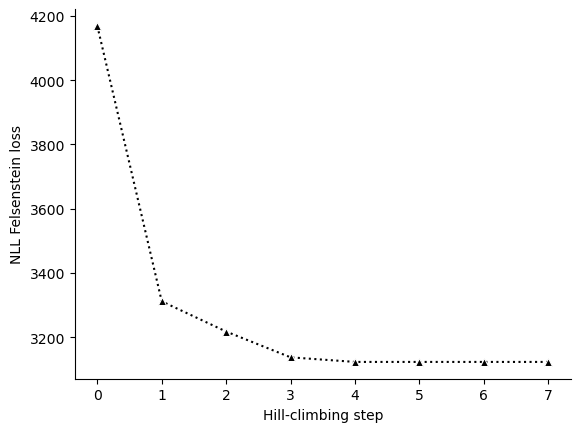

In [30]:
import importlib
import utils.plot
importlib.reload(utils.plot)
from utils.plot import plot_loss

plot_loss(losses, xlabel='Hill-climbing step', linestyle='dotted', marker='^')